In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'
df = pd.read_csv(path)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### (1) Did people become less trusting from 2012-2014? Computer results for each country in sample.

In [3]:
def ess_hist(self):
    g = sns.FacetGrid(data=df,
                      row='year',
                      col='cntry',
                      margin_titles=True,
                      dropna=True,
                      sharey=False)

    g.map(plt.hist, self)
    plt.show()

def ess_normaltest(self):
    for cntry in df['cntry'].unique():
        x = df.loc[(df['year'] == 6) & (df['cntry'] == cntry), self]
        y = df.loc[(df['year'] == 7) & (df['cntry'] == cntry), self]
        print('normal test {}'.format(cntry))
        print('2012: {}'.format(stats.normaltest(x, nan_policy='omit')))
        print('2014: {}'.format(stats.normaltest(y, nan_policy='omit')))

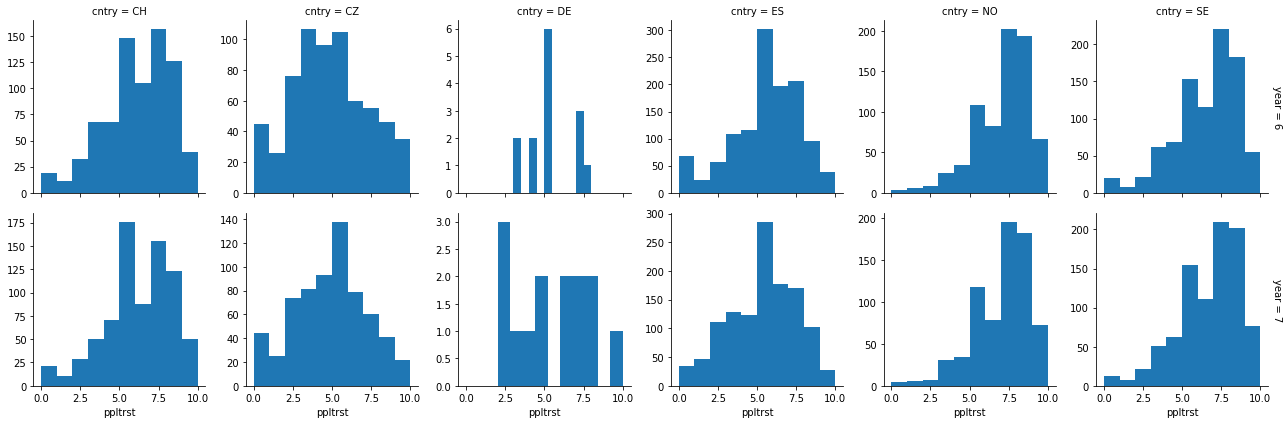

In [4]:
ess_hist('ppltrst')

In [5]:
ess_normaltest('ppltrst')

normal test CH
2012: NormaltestResult(statistic=34.41403485540727, pvalue=3.365792056559453e-08)
2014: NormaltestResult(statistic=32.07122389622901, pvalue=1.0859809748932778e-07)
normal test CZ
2012: NormaltestResult(statistic=25.049370820773337, pvalue=3.6357853778444874e-06)
2014: NormaltestResult(statistic=8.015640651166011, pvalue=0.0181729632415102)
normal test DE
2012: NormaltestResult(statistic=0.5537028123495471, pvalue=0.7581671476973477)
2014: NormaltestResult(statistic=0.6451892229565249, pvalue=0.7242674045554323)
normal test ES
2012: NormaltestResult(statistic=48.02764152552339, pvalue=3.7233182008430934e-11)
2014: NormaltestResult(statistic=29.796593978669407, pvalue=3.3865058313913864e-07)
normal test NO
2012: NormaltestResult(statistic=85.4862970000314, pvalue=2.7345537691839186e-19)
2014: NormaltestResult(statistic=71.2109329693447, pvalue=3.441457258129768e-16)
normal test SE
2012: NormaltestResult(statistic=72.6342910118729, pvalue=1.6891340175735596e-16)
2014: Norm

In [7]:
print('ES')
print('Mean 2012:',np.mean(df.ppltrst[(df.year==6)&(df.cntry=='ES')]))
print('Mean 2014:',np.mean(df.ppltrst[(df.year==7)&(df.cntry=='ES')]))
print()
print('SE')
print('Mean 2012:',np.mean(df.ppltrst[(df.year==6)&(df.cntry=='SE')]))
print('Mean 2014:',np.mean(df.ppltrst[(df.year==7)&(df.cntry=='SE')]))

ES
Mean 2012: 5.114591920857379
Mean 2014: 4.895127993393889

SE
Mean 2012: 6.058498896247241
Mean 2014: 6.257709251101321


### (2) Did people become happier from 2012-2014?

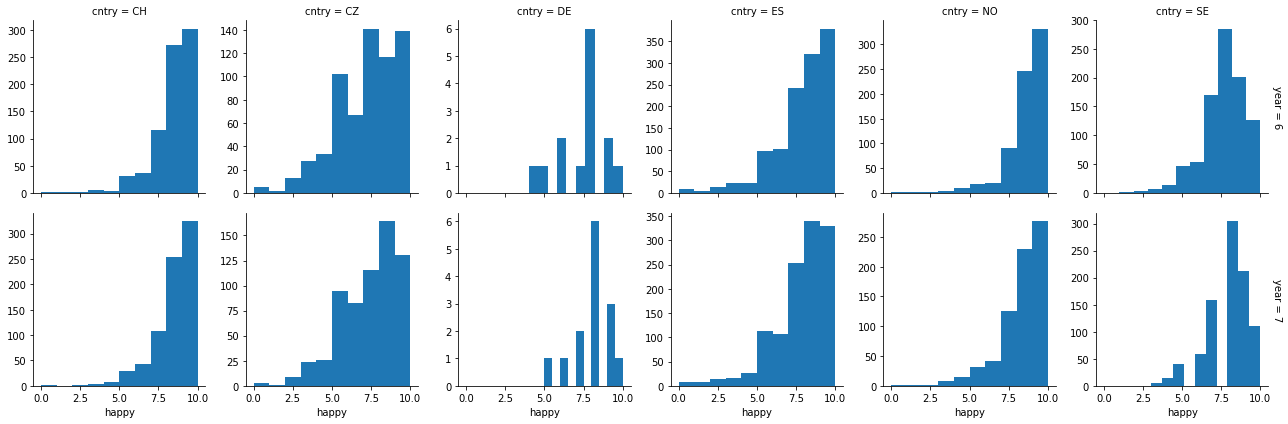

In [8]:
ess_hist('happy')

In [9]:
for cntry in df['cntry'].unique():
    x = df.loc[(df['year'] == 6) & (df['cntry'] == cntry), 'happy']
    y = df.loc[(df['year'] == 7) & (df['cntry'] == cntry), 'happy']
    result = stats.wilcoxon(x, y)
    print('\nHappy results for {}'.format(cntry))
    print('Mean 2012: {}'.format(np.mean(x)))
    print('Mean 2014: {}'.format(np.mean(y)))
    print(result)
    if cntry == 'DE':
        print(stats.ttest_rel(x, y, nan_policy='omit'))


Happy results for CH
Mean 2012: 8.088311688311688
Mean 2014: 8.116429495472186
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

Happy results for CZ
Mean 2012: 6.7708978328173375
Mean 2014: 6.914110429447852
WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

Happy results for DE
Mean 2012: 7.428571428571429
Mean 2014: 7.857142857142857
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)

Happy results for ES
Mean 2012: 7.548679867986799
Mean 2014: 7.41996699669967
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

Happy results for NO
Mean 2012: 8.25171939477304
Mean 2014: 7.9151846785225715
WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

Happy results for SE
Mean 2012: 7.907386990077177
Mean 2014: 7.946961325966851
WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


- Czech Republic had significant increase in happiness where average is up while the p-value stays significant around .01
- ES (Spain): pval is .049 so technically this could be interpreted as a significant decrease in happiness as the average happiness goes down


### (3) Who reported watching more TV in 2012 - men or women?

In [10]:
print(len(df.loc[(df['year'] == 6) & (df['gndr'] == 1), 'tvtot']))
print(len(df.loc[(df['year'] == 6) & (df['gndr'] == 2), 'tvtot']))

2154
2143


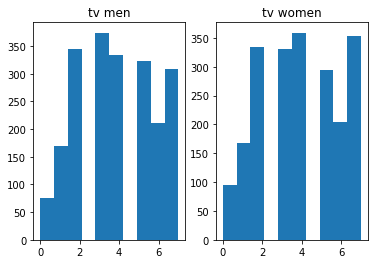

NormaltestResult(statistic=398.40028887354515, pvalue=3.0794735397083993e-87)
NormaltestResult(statistic=473.95970583307366, pvalue=1.2049181771413786e-103)
WilcoxonResult(statistic=833980.0, pvalue=0.5165339327258109)


In [11]:
tv_women_2012 = df.loc[(df['year'] == 6) & (df['gndr'] == 2), 'tvtot'].dropna()
tv_men_2012 = df.loc[
    (df['year'] == 6) & (df['gndr'] == 1), 'tvtot'
].dropna().sample(len(tv_women_2012))

plt.subplot(1,2,1)
plt.hist(tv_men_2012.dropna())
plt.title('tv men')
         
plt.subplot(1,2,2)
plt.hist(tv_women_2012.dropna())
plt.title('tv women')
plt.show()

print(stats.normaltest(tv_men_2012))
print(stats.normaltest(tv_women_2012))
print(stats.wilcoxon(tv_men_2012, tv_women_2012))

- P-Value of .516 doesn't tell me with much confidence that there is significant difference in TV watching between men and women

### (4) Who was more likely to believe people were fair in 2012 - people living with a partner or people living alone?

In [12]:
live_partner = df.loc[(df['partner'] == 1) & (df['year'] == 6), 'pplfair'].dropna()
live_alone = df.loc[(df['partner'] == 2) & (df['year'] == 6), 'pplfair'].dropna()

print(len(live_partner), len(live_alone))

2663 1608


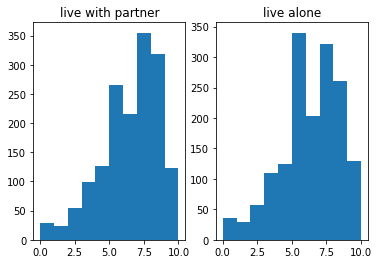

NormaltestResult(statistic=98.40039734467939, pvalue=4.291659008827871e-22)
NormaltestResult(statistic=64.92830332216809, pvalue=7.961558194894824e-15)


In [13]:
live_partner = live_partner.sample(len(live_alone))
plt.subplot(1,2,1)
plt.hist(live_partner)
plt.title('live with partner')

plt.subplot(1,2,2)
plt.hist(live_alone)
plt.title('live alone')
plt.show()

print(stats.normaltest(live_partner))
print(stats.normaltest(live_alone))

In [14]:
print('mean live with partner: {}'.format(np.mean(live_partner)))
print('mean live alone: {}'.format(np.mean(live_alone)))
print(stats.wilcoxon(live_partner, live_alone))

mean live with partner: 6.050373134328358
mean live alone: 5.856965174129353
WilcoxonResult(statistic=443354.5, pvalue=0.011955111904365951)


People who lived alone were less trustworthy than people who lived with a partner. P-value shows this with confidence.

### (5) Pick three or four countries in the sample and compare how often people met socially in 2014. Are there differences and if so which countries stand out?

['CH' 'CZ' 'NO' 'SE']


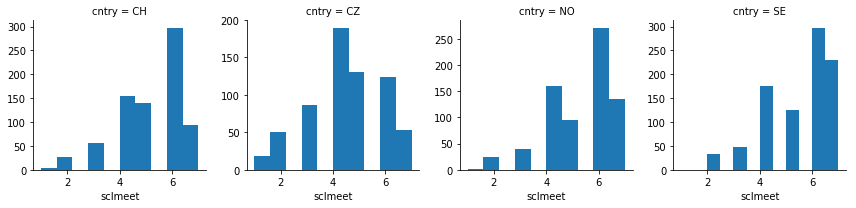

CH: NormaltestResult(statistic=98.88952667427156, pvalue=3.3605636360566126e-22)
CZ: NormaltestResult(statistic=79.93520409212844, pvalue=4.3882461097052515e-18)
NO: NormaltestResult(statistic=117.20984403812162, pvalue=3.533505362569494e-26)
SE: NormaltestResult(statistic=145.63772426391498, pvalue=2.3723021236027454e-32)


In [15]:
countries = np.random.choice(
    df.loc[df['cntry'] != 'DE', 'cntry'].unique(),
    4,
    replace=False
)
print(countries)

df_countries = df[(df.cntry).isin(countries) & (df.year == 7)]
g = sns.FacetGrid(df_countries,
                  col='cntry',
                  dropna=True,
                  sharey=False)
g.map(plt.hist, 'sclmeet')
plt.show()

for cntry in countries:
    print('{}: {}'.format(
        cntry,
        stats.stats.normaltest(df.loc[df['cntry'] == cntry, 'sclmeet'],
                               nan_policy='omit')))

In [16]:
import itertools
cntry_pairs = list(itertools.combinations(countries, 2))

for pair in cntry_pairs:
    x = df_countries.loc[df_countries['cntry'] == pair[0], 'sclmeet']
    y = df_countries.loc[df_countries['cntry'] == pair[1], 'sclmeet']
    if len(x) < len(y):
        y = y.sample(len(x))
        result = stats.wilcoxon(x,y)
    elif len(y) < len(x):
        x = x.sample(len(y))
        result = stats.wilcoxon(x,y)
    else:
        result = stats.wilcoxon(x,y)
    print('{0} and {1}: {2}'.format(pair[0], pair[1], result))

CH and CZ: WilcoxonResult(statistic=42689.5, pvalue=2.7129248736511538e-18)
CH and NO: WilcoxonResult(statistic=68732.0, pvalue=0.047207505391483835)
CH and SE: WilcoxonResult(statistic=66791.0, pvalue=9.952941080770308e-05)
CZ and NO: WilcoxonResult(statistic=39266.0, pvalue=1.1318115785723944e-22)
CZ and SE: WilcoxonResult(statistic=31451.5, pvalue=1.0382627673054994e-29)
NO and SE: WilcoxonResult(statistic=72715.0, pvalue=0.16104969897926902)
